In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import pickle
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
Dataset="/content/drive/MyDrive/Signature/BHSig260-Bengali/dataset"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['98', '95', '99', '97', '96', '94', '93', '92', '91', '90', '89', '87', '9', '86', '88', '85', '84', '83', '82', '81', '80', '78', '77', '79', '8', '76', '75', '74', '73', '72', '7', '68', '70', '69', '71', '67', '66', '65', '64', '63', '59', '61', '62', '6', '60', '58', '57', '56', '55', '54', '5', '50', '52', '53', '51', '49', '48', '47', '46', '45', '43', '42', '41', '44', '40', '4', '39', '38', '37', '36', '35', '34', '29', '28', '31', '30', '3', '33', '32', '27', '26', '25', '24', '23', '21', '22', '19', '20', '2', '18', '17', '16', '15', '14', '13', '1', '0', '12', '11', '10']


In [6]:
images = []
classNo = []
classes = 100
epochs_val = 50
batch_size = 32
imageDimensions = (360,100,3)

In [7]:
# Load the saved arrays
X_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/y_test.npy')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4320, 360, 100, 3) (1080, 360, 100, 3) (4320, 100) (1080, 100)


In [8]:
from keras.models import Model
from keras.applications.resnet import ResNet101
from keras.applications.resnet import preprocess_input

In [9]:
resnet101  = ResNet101(input_shape=imageDimensions,
                               weights='imagenet',
                               include_top=False)

for layer in resnet101 .layers:
  layer.trainable = False

In [10]:
# No of layers
x = Flatten()(resnet101.output)
prediction = Dense(classes, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet101.input, outputs=prediction)

# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 360, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 366, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 180, 50, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 180, 50, 64)  256         ['conv1_conv[0][0]']         

In [12]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs_val, 
                    validation_data=(X_test, y_test))

Epoch 1/50
135/135 [==============================] - 39s 222ms/step - loss: 16.2452 - accuracy: 0.4477 - val_loss: 4.9388 - val_accuracy: 0.6833
Epoch 2/50
135/135 [==============================] - 22s 159ms/step - loss: 2.1630 - accuracy: 0.8338 - val_loss: 2.8405 - val_accuracy: 0.8083
Epoch 3/50
135/135 [==============================] - 21s 159ms/step - loss: 1.1298 - accuracy: 0.9035 - val_loss: 4.2771 - val_accuracy: 0.7843
Epoch 4/50
135/135 [==============================] - 22s 160ms/step - loss: 1.7636 - accuracy: 0.8845 - val_loss: 4.3312 - val_accuracy: 0.7824
Epoch 5/50
135/135 [==============================] - 22s 166ms/step - loss: 1.1087 - accuracy: 0.9194 - val_loss: 4.5308 - val_accuracy: 0.7981
Epoch 6/50
135/135 [==============================] - 21s 159ms/step - loss: 0.8566 - accuracy: 0.9400 - val_loss: 2.7049 - val_accuracy: 0.8583
Epoch 7/50
135/135 [==============================] - 22s 160ms/step - loss: 0.6039 - accuracy: 0.9560 - val_loss: 3.6802 - val_a

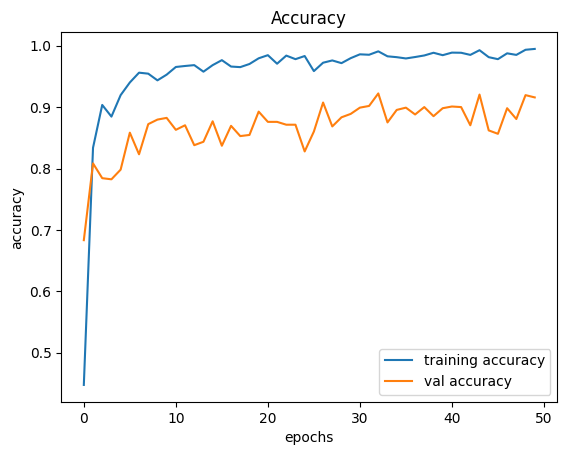

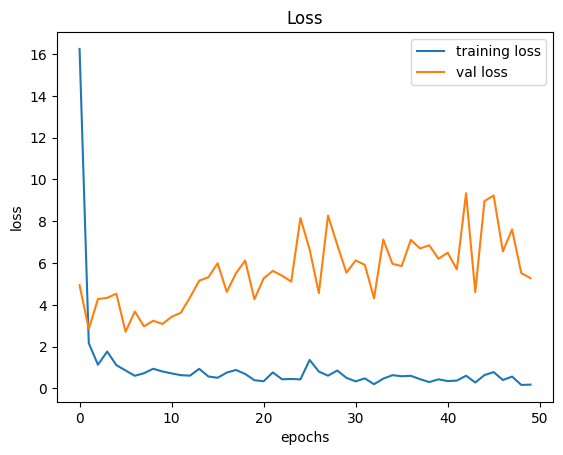

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.9979166388511658


In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9157407283782959


In [16]:
pred = np.argmax(model.predict(X_test), axis = 1)

34/34 [==============================] - 6s 126ms/step


In [17]:
actual=np.argmax(y_test, axis = 1)

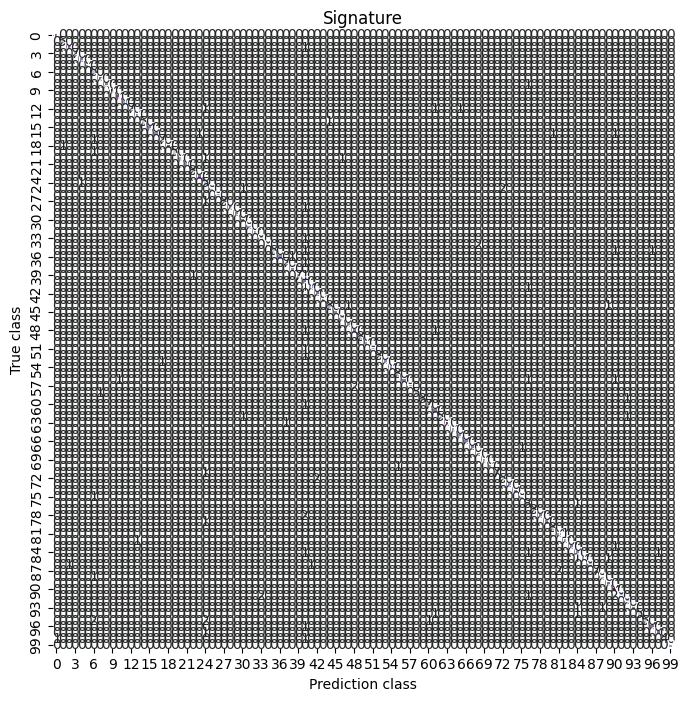

In [18]:
cm = confusion_matrix(actual, pred)
# cm_df = pd.DataFrame(cm)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True,cmap='BuPu',cbar=False,linewidth=2,fmt='d')
plt.title('Signature')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [19]:
cf = classification_report(actual, pred)
print(cf)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.83      1.00      0.91         5
           2       0.93      0.93      0.93        15
           3       1.00      1.00      1.00         7
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        10
           6       0.50      1.00      0.67         6
           7       0.93      1.00      0.97        14
           8       1.00      0.92      0.96        13
           9       1.00      1.00      1.00        20
          10       0.94      1.00      0.97        16
          11       1.00      1.00      1.00        10
          12       1.00      0.70      0.82        10
          13       0.91      1.00      0.95        10
          14       1.00      0.83      0.91         6
          15       1.00      1.00      1.00        12
          16       1.00      0.79      0.88        14
          17       0.88    